In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import date

os.chdir("../")

from machine_learning.mlMethods import *
from machine_learning.mlSupportMethods import *
from machine_learning.visualization import *

In [3]:
df_input = read_and_get_input_v2(base_path+\
            '/data_sus/finais/input_ml_ocorrencia_doencas_v5.csv')

df_input['data'] = df_input[['mes', 'ano']].apply(lambda x: date(x[1], x[0], 1), axis=1)

df_input_ml = df_input[df_input['ano'].isin(
    list(range(2014, 2017, 1)))]
df_previsao_real = df_input[df_input['ano'].isin(
    list(range(2017, 2018, 1)))]
df_previsao_real = df_previsao_real[df_input['mes'].isin(
    list(range(1, 13, 1)))]

columns_filtered = ['temp_solo', 'precipitacao', 'umidade',
                   'max_vizinhos_t-1', 'media_vizinhos_t-1', 'max_vizinhos_t-3', 'media_vizinhos_t-3',
                    'max_vizinhos_t-6', 'media_vizinhos_t-6', 'Esperança de vida ao nascer (em anos)',
                   'Taxa de alfabetização de adultos (%)',
                   'Taxa bruta de frequência escolar (%)',
                   'Renda per capita (em R$ de 2000)', 'IDH-L', 'IDH-E', 'IDH-R', 'IDH',
                   't-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9', 't-10', 't-11', 't-12', 'qtd_cnes', 'qtd_serv_atencao_basica', 'qtd_serv_ACS_program',
                   'qtd_serv_prenatal', 'qtd_serv_neonatal', 'qtd_serv_plano_familia_STD',
                   'qtd_afiliacao_sus',
                   'dengue_diagnosis']

# columns_filtered = ['temp_solo', 'precipitacao',
#                    'max_vizinhos']

# Pensar em como olhar a correlação com categoricos
# categorical_columns = ['nome_bairro','mes']

Boolean Series key will be reindexed to match DataFrame index.


In [7]:
df_ml = df_input_ml[columns_filtered]

df_ml.columns = ['temp', 'prec', 'umid',
                   'max_v_t-1', 'med_v_t-1', 'max_v_t-3', 'med_v_t-3', 'max_v_t-6', 'med_v_t-6',
                   'Esper vida (em anos)', 'Alfab', 'freq esc',
                   'Rend cap', 'IDH-L', 'IDH-E', 'IDH-R', 'IDH',
                   't-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9', 't-10', 't-11', 't-12',
                   'cnes', 'basica', 'ACS',
                   'prenatal', 'neonatal', 'plano_fam',
                   'afilia_sus',
                   'dengue_diag']

columns_filtered = ['Esper vida (em anos)', 'Alfab', 'freq esc',
                   'Rend cap', 'IDH-L', 'IDH-E', 'IDH-R', 'IDH']

df_ml = df_ml[columns_filtered]

corr_matrix = np.corrcoef(df_ml, rowvar=False).round(decimals=2)

In [8]:
df_ml.columns

Index(['temp', 'prec', 'umid', 'max_v', 'Esper vida (em anos)', 'Alfab',
       'freq esc', 'Rend cap', 'IDH-L', 'IDH-E', 'IDH-R', 'IDH', 't-1', 't-2',
       't-3', 't-4', 't-5', 't-6', 't-7', 't-8', 't-9', 't-10', 't-11', 't-12',
       'dengue_diag'],
      dtype='object')

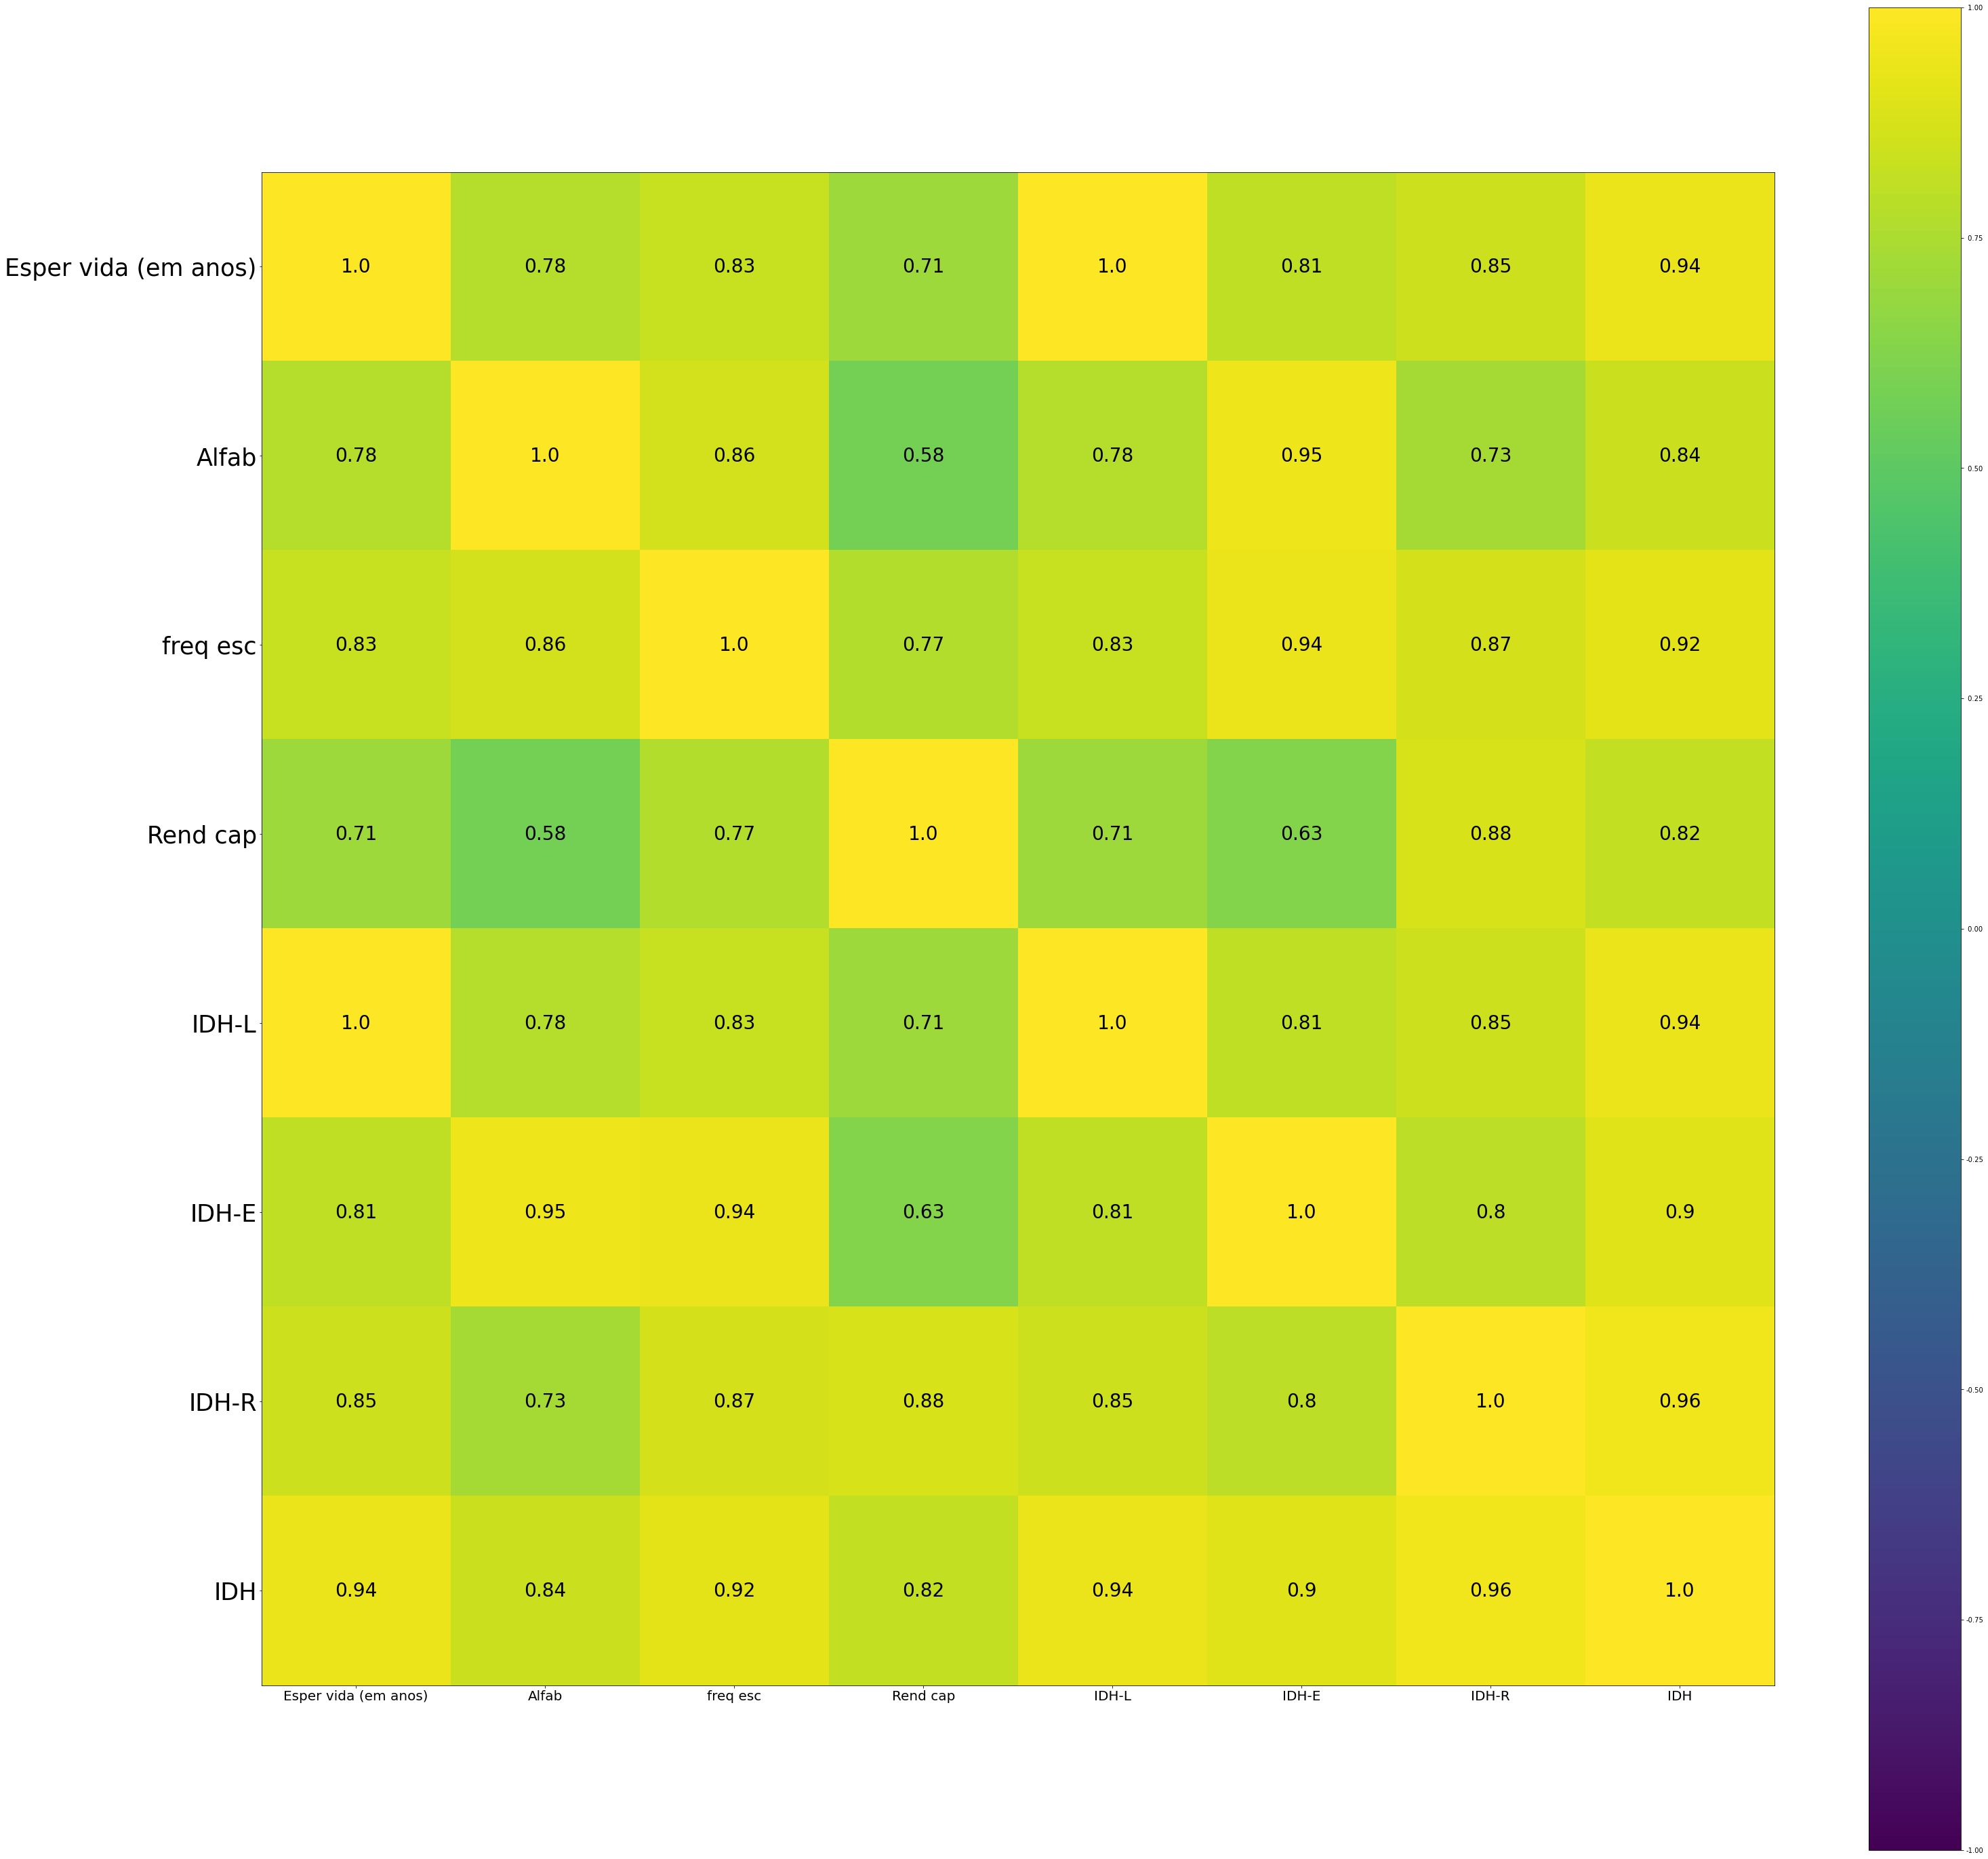

In [8]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(50, 50))
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set_ticks(tuple(range(len(df_ml.columns)))) 
ax.xaxis.set_ticklabels(tuple(df_ml.columns), fontsize=20)
ax.yaxis.set_ticks(tuple(range(len(df_ml.columns)))) 
ax.yaxis.set_ticklabels(tuple(df_ml.columns), fontsize=35)
for i, c in enumerate(columns_filtered):
    for j, d in enumerate(columns_filtered):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='black', fontsize=28)
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [ ]:
df = df_input[df_input['ano'].isin(
    list(range(2014, 2018, 1)))]

df = df.pivot_table(index=["data"], values=["dengue_diagnosis", "influenza_diagnosis"], aggfunc="sum")

df = df.reset_index()

fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.plot(df["data"], df["influenza_diagnosis"], color="blue", linewidth=6)
ax2.plot(df["data"], df["dengue_diagnosis"], color="green", linewidth=6, linestyle='--')

ax1.set_xlabel("data")
ax1.set_ylabel("influenza_diagnosis", color='b')
ax2.set_ylabel('dengue_diagnosis', color='g')

plt.show()

In [ ]:
df_input["dengue_diagnosis"].sum()

In [ ]:
df_input["influenza_diagnosis"].sum()